In [1]:
using SeisMain, SeisPlot
# Manipulation of data and binning

In [2]:
download("http://seismic.physics.ualberta.ca/data/prestack_section.su","section.su");

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.8M  100 65.8M    0     0  65.8M      0  0:00:01 --:--:--  0:00:01 97.2M


In [3]:
SegyToSeis("section.su","section",format="su",input_type="ieee");

number of traces: 55476
number of samples per trace: 251


In [4]:
d,h,ext=SeisRead("section");

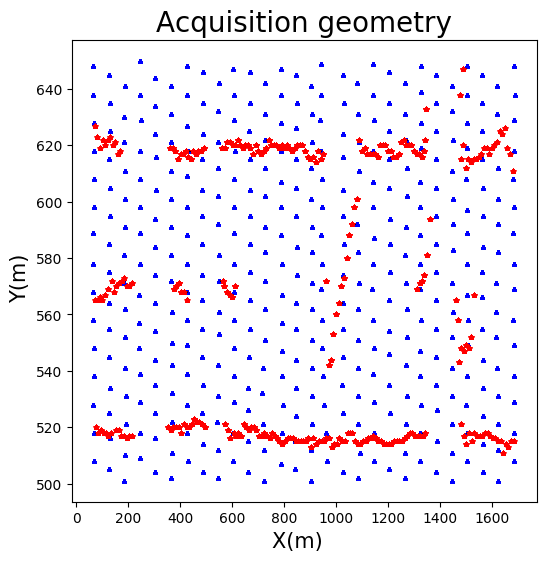

PyObject <matplotlib.collections.PathCollection object at 0x7f52979c7f90>

In [5]:
SeisPlotCoordinates(h,title="Acquisition geometry", xlabel="X(m)",ylabel="Y(m)")

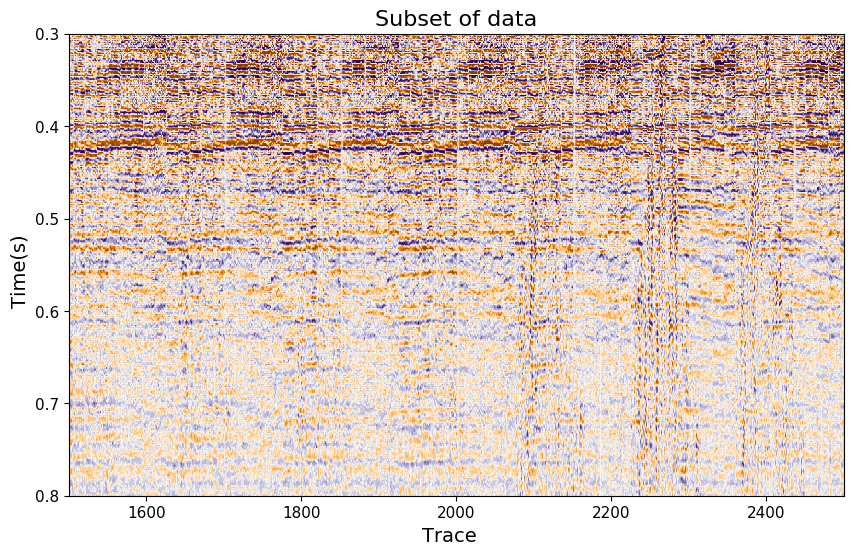

im

In [7]:
# Plot subset of prestack volume

SeisPlotTX(d[:,1000:2000],xlabel="Trace",ylabel="Time(s)", dy=0.002,oy=0.3,title="Subset of data",ox=1500,wbox=10)

In [8]:
# Set parameter for binned geometry

param1 = Dict( :dmx=>15, :dmy=>15, :dh=>30, :daz=>45 );
 
param2 = Dict(:style=>"mxmyhaz", :min_imx=>10,:max_imx=>100, :min_imy=>35, :max_imy=>45,
               :min_ih=>1, :max_ih=>6, :min_iaz=>0, :max_iaz=>7);



In [9]:
# add desired  binned geometry to headers without destroying s-r position of traces

SeisGeometry("section"; param1...)


In [10]:
#  Prepares headers for data binning and QC 

SeisBinHeaders("section","section_bin"; param1..., param2...);



nt= 251
The final binned cube will have an approximate size of 0.048 Gb


In [11]:
# Assign traces to their corresponding bin

SeisBinData("section","section_bin"; param1..., param2...)

In [13]:
# Read binned volume 

db,hb,eb=SeisRead("section_bin");

In [14]:
# Check size of 5D prestack data tensor obtained by binning
# db = db[time, midpoint_x, midpoint_y, offset, Azimuth]
N =size(db)

# Plot one CMPx-CMPy bin with all offsets and azimuths

(251, 91, 11, 6, 8)

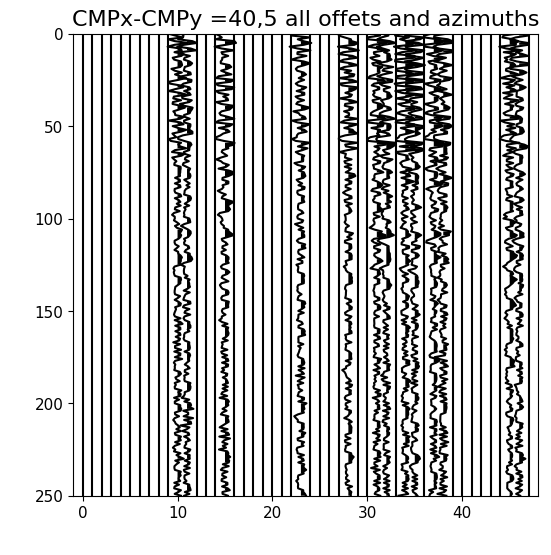

im

In [15]:
SeisPlotTX(reshape(db[:,40,5,:,:], N[1],N[4]*N[5]), style="wiggles", title="CMPx-CMPy =40,5 all offets and azimuths")